In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("wine_data.csv",header = None)

In [8]:
df = df.iloc[:,0:3]
df

,0,1,2
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [9]:
df.columns = ["Class label",'Alcohol','Malic acid']

In [10]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


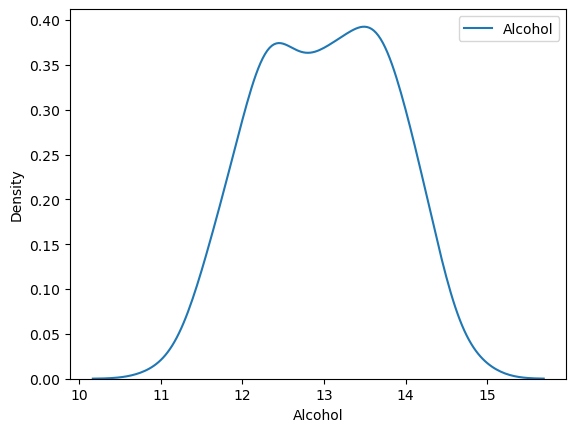

In [17]:
sns.kdeplot(df["Alcohol"],label="Alcohol")
plt.legend()
plt.show()

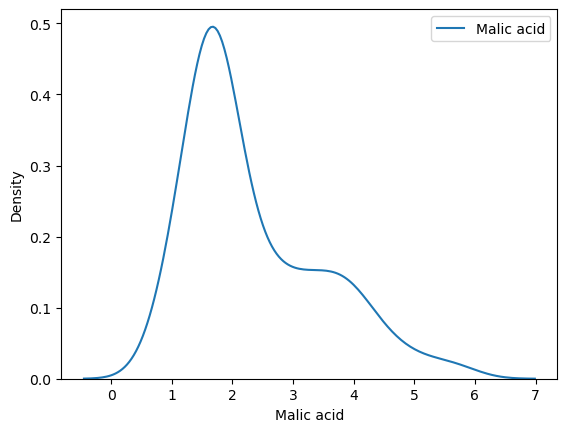

In [18]:
sns.kdeplot(df["Malic acid"],label="Malic acid")
plt.legend()
plt.show()

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

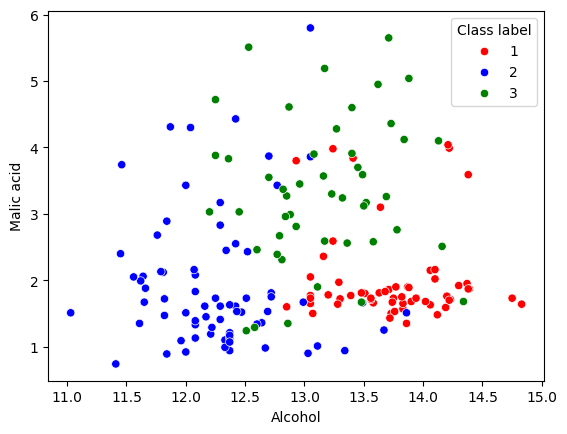

In [22]:
color_dict = {1:'red',3:'green',2:'blue'}
sns.scatterplot(x= df['Alcohol'],y= df['Malic acid'],hue=df['Class label'],palette = color_dict)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Class label', axis = 1),df['Class label'],test_size= 0.3,random_state=0)

In [28]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [29]:
scaler = MinMaxScaler()

scaler.fit(X_train)

# Transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [34]:
np.round(X_train_scaled.describe())

,Alcohol,Malic acid
count,124.0,124.0
mean,1.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,1.0


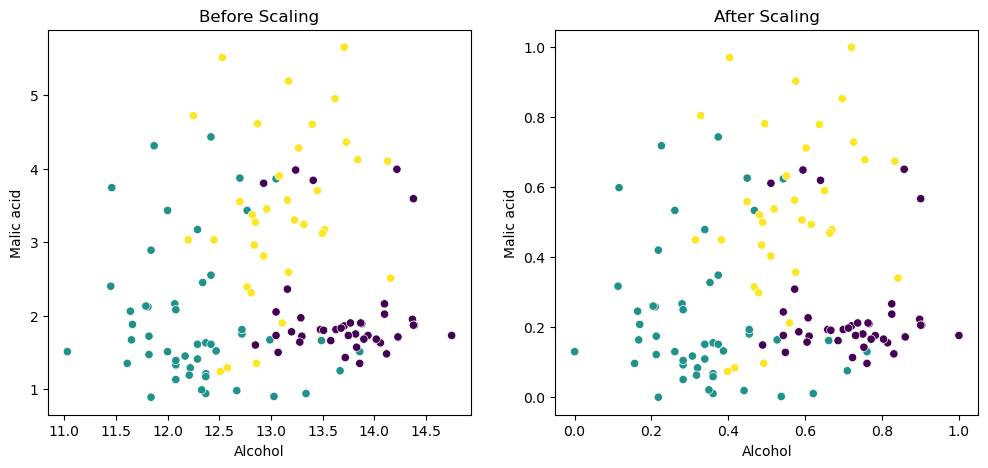

In [44]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

sns.scatterplot(x=X_train['Alcohol'],y=X_train["Malic acid"],c=y_train,ax=ax1)
ax1.set_title("Before Scaling")
sns.scatterplot(x=X_train_scaled['Alcohol'],y=X_train_scaled['Malic acid'],ax=ax2,c=y_train)
ax2.set_title("After Scaling")
plt.show()

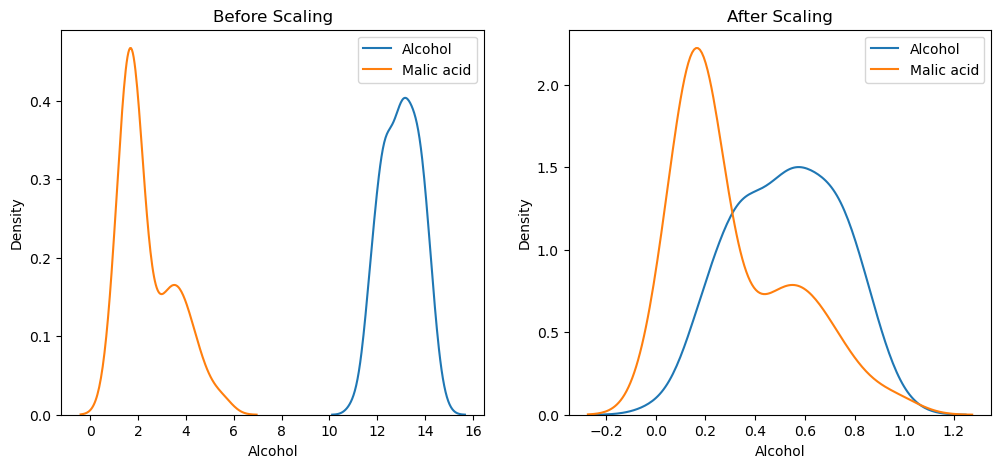

In [49]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize= (12,5))

# Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1,label="Alcohol")
sns.kdeplot(X_train['Malic acid'],ax=ax1,label="Malic acid")
ax1.legend()

# After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2,label='Alcohol')
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2,label='Malic acid')
ax2.legend()
plt.show()

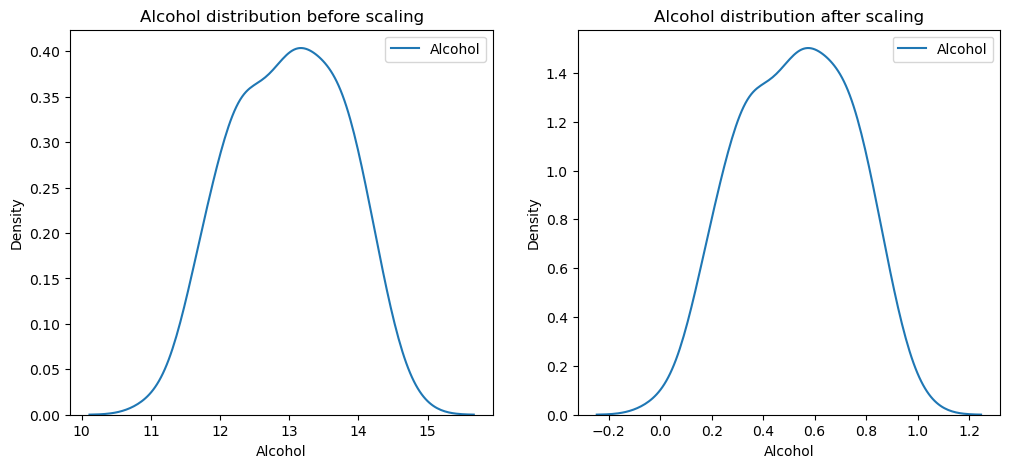

In [51]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize= (12,5))

# Before Scaling
ax1.set_title("Alcohol distribution before scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1,label='Alcohol')
ax1.legend()
# After Scaling 
ax2.set_title("Alcohol distribution after scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2,label ='Alcohol')
ax2.legend()

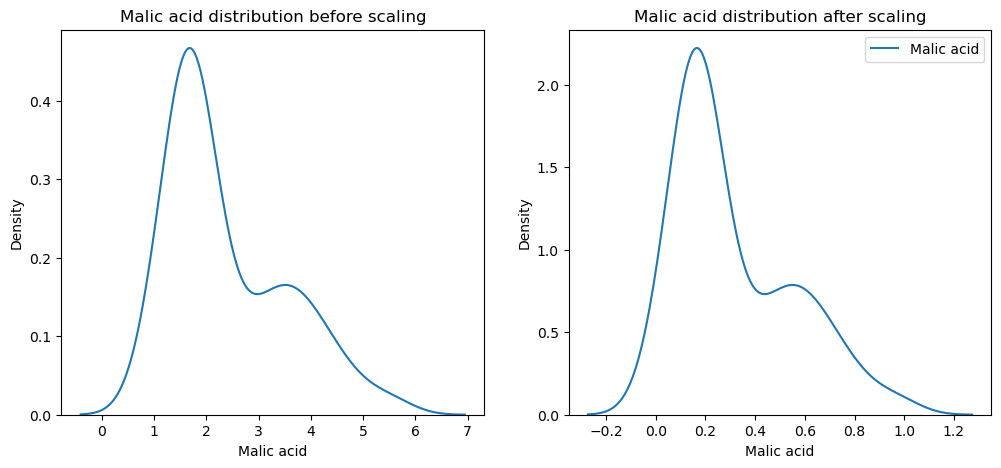

In [53]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize= (12,5))

# Before Scaling
ax1.set_title("Malic acid distribution before scaling")
sns.kdeplot(X_train['Malic acid'],ax=ax1,label='Malic acid')
ax1.legend
# After Scaling 
ax2.set_title("Malic acid distribution after scaling")
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2,label ='Malic acid')
ax2.legend()